In [1]:
import torch
import torch.nn as nn
# import torch.nn.functional a F
# from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./iris.data', header = None)

df.columns = [
    'sepal length [cm]',
    'sepal width [cm]',
    'petal length [cm]',
    'petal width [cm]',
    'species',
]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length [cm]  150 non-null    float64
 1   sepal width [cm]   150 non-null    float64
 2   petal length [cm]  150 non-null    float64
 3   petal width [cm]   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head().transpose()

0            1            2            3   
sepal length [cm]          5.1          4.9          4.7          4.6  \
sepal width [cm]           3.5          3.0          3.2          3.1   
petal length [cm]          1.4          1.4          1.3          1.5   
petal width [cm]           0.2          0.2          0.2          0.2   
species            Iris-setosa  Iris-setosa  Iris-setosa  Iris-setosa   

                             4  
sepal length [cm]          5.0  
sepal width [cm]           3.6  
petal length [cm]          1.4  
petal width [cm]           0.2  
species            Iris-setosa

In [4]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
mappings = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica':2,
}

df['species'] = df['species'].apply(lambda x: mappings[x])

df.head().transpose()

0    1    2    3    4
sepal length [cm]  5.1  4.9  4.7  4.6  5.0
sepal width [cm]   3.5  3.0  3.2  3.1  3.6
petal length [cm]  1.4  1.4  1.3  1.5  1.4
petal width [cm]   0.2  0.2  0.2  0.2  0.2
species            0.0  0.0  0.0  0.0  0.0

## Data visualization

In [6]:
colors_dict = {0:'red', 1:'blue', 2:'green'}

In [7]:
colors = df['species'].apply(lambda x: colors_dict[x])

array([[<Axes: xlabel='sepal length [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='sepal width [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='petal length [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='petal width [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='species', ylabel='sepal length [cm]'>],
       [<Axes: xlabel='sepal length [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='sepal width [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='petal length [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='petal width [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='species', ylabel='sepal width [cm]'>],
       [<Axes: xlabel='sepal length [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel='sepal width [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel='petal length [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel='petal width [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel

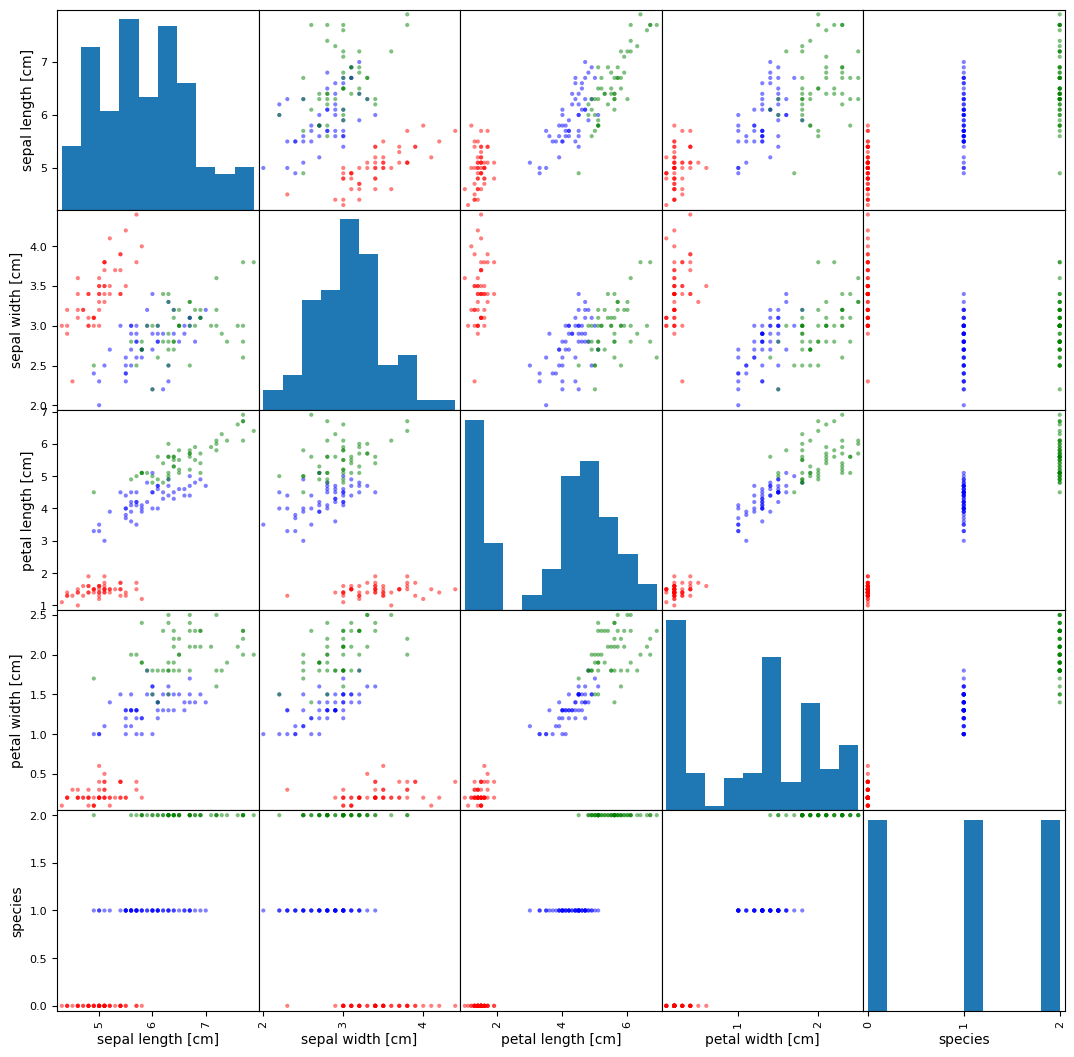

In [8]:
pd.plotting.scatter_matrix(
    df,
    figsize = (13, 13),
    color = colors,
)

In [9]:
fig, ax = plt.subplots()
ax.hist(df['species'])

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

## Prepare data

In [10]:
X = df.drop('species', axis = 1).values

y = df['species'].values

In [11]:
## Training and testing datasets

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.5)

In [12]:
## Validation and testing datasets

X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size = 0.5)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(150, 4)
(75, 4)
(37, 4)
(38, 4)


In [14]:
## Transform into Pytorch tensors

X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

In [15]:
type(y_test)

torch.Tensor

## Create NN model

In [16]:
class my_nn(nn.Module):

    # Init method to define layers
    def __init__(self, input_dim=4, hidden_layer=30, output_dim=3):
        super().__init__()

        # First fully connected layer
        self.fc1 = nn.Linear(input_dim, hidden_layer)

        # Seccond fully connected layer
        self.fc2 = nn.Linear(hidden_layer, hidden_layer)

        # Activation function
        self.act = nn.ReLU()

        # Outpul layer
        self.output = nn.Linear(hidden_layer, output_dim)

    # Forward method to define flow of information
    def forward(self, x):

        # First layer
        x = self.act(self.fc1(x))

        # Second layer
        x = self.act(self.fc2(x))

        # Output layer
        x = self.output(x)

        return x

In [17]:
model = my_nn()

model

my_nn(
  (fc1): Linear(in_features=4, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (act): ReLU()
  (output): Linear(in_features=30, out_features=3, bias=True)
)

## Define training methods

In [18]:
cost_function = nn.CrossEntropyLoss()

# Optimizing algorithm
optimizer = torch.optim.Adam(model.parameters(), lr=0.00075)

## Model training

In [19]:
epochs = 275

# Initial loss values
train_loss = np.zeros(shape=(epochs))
valid_loss = np.zeros(shape=(epochs))

# Initial metrics
valid_acc = np.zeros(shape=(epochs))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10,3))

# Loop through epochs
for epoch in range(epochs):

    ## Train on training data

    # Get predictions and loss value
    predictions = model.forward(X_train)
    loss = cost_function(predictions, y_train)
    train_loss[epoch] = loss

    # Get to zero gradient
    optimizer.zero_grad()

    # Get gradient value using backprop
    loss.backward()

    # Update parameters (Adams algorithm specified in previous cell)
    optimizer.step()

    ## Validate on validation data

    # Get predictions and loss value
    predictions_val = model.forward(X_val)
    loss_val = cost_function(predictions_val, y_val)
    valid_loss[epoch] = loss_val

    valid_acc[epoch] = accuracy_score(
        y_val.detach().numpy(),
        torch.argmax(predictions_val, 1).detach().numpy()
    )


    ## Plots

    # Train loss
    ax[0].plot(train_loss[0: epoch], c = 'green')
    ax[0].plot(valid_loss[0: epoch], c = 'red')  

    # Plot metric evolution (accuracy) 
    ax[1].plot(valid_acc[0: epoch], c = "red")

    # Update plot live
    fig.canvas.draw()


## Analyze on test dataset

In [20]:
predictions_test = model.forward(X_test)

predictions_test = torch.argmax(predictions_test, 1)

In [21]:
cm = confusion_matrix(y_test, predictions_test, normalize='true')
cm

array([[1.        , 0.        , 0.        ],
       [0.        , 0.90909091, 0.09090909],
       [0.        , 0.        , 1.        ]])

<Axes: >

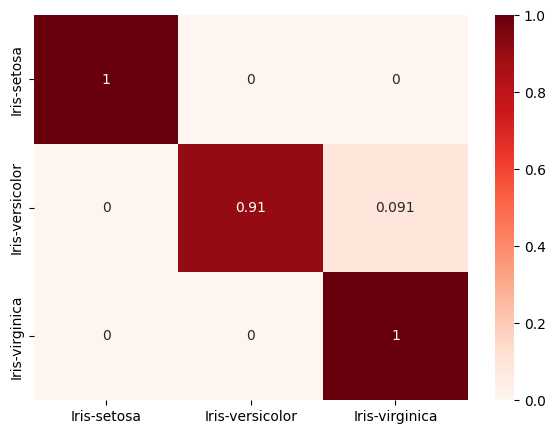

In [22]:
fig, ax = plt.subplots(figsize = (7, 5))

sn.heatmap(cm, annot=True, 
    yticklabels=[x for x in mappings],
    xticklabels=[x for x in mappings],
    cmap=plt.cm.Reds)

In [23]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

